## [Bài tập] Trực quan hóa cơ bản dữ liệu GDP list

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
data = pd.read_csv("GDPlist.csv", encoding = "ISO-8859-1")
data

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


## So sánh GDP các nước ở South America.

In [4]:
# lấy dữ liệu cần
data1 = data[(data.loc[:,'Continent'] == 'South America')]
data1

,Country,Continent,GDP (millions of US$)
4,Argentina,South America,447644
15,Brazil,South America,2492908
22,Chile,South America,248411
24,Colombia,South America,328422
34,Ecuador,South America,66381
86,Paraguay,South America,21236
87,Peru,South America,173502
119,Uruguay,South America,46872
121,Venezuela,South America,315841


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 4 to 121
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                9 non-null      object
 1   Continent              9 non-null      object
 2   GDP (millions of US$)  9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 288.0+ bytes


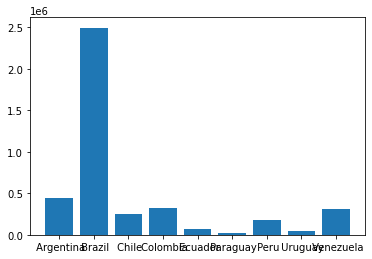

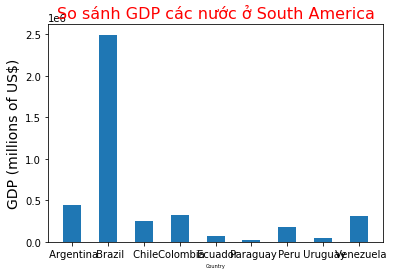

In [6]:
# Vẽ biểu đồ cột

plt.bar(data1.loc[:,'Country'], data1.loc[:,'GDP (millions of US$)'])
plt.show()
# Tinh chỉnh thuộc tính biểu đồ
# In [45]:

plt.bar(data1.loc[:,'Country'], data1.loc[:,'GDP (millions of US$)'], width = 0.5)

plt.title('So sánh GDP các nước ở South America', fontsize = 16, color = 'r')
plt.xlabel('Country', fontsize = 5)
plt.ylabel('GDP (millions of US$)', fontsize = 14)
plt.show()

## Biểu đồ để đánh giá tỉ lệ đóng góp GDP của các nước trên tổng số GDP của 5 nước Vietnam,  Indonesia, Cambodia, Thailand và Malaysia.

In [7]:
data.loc[:,'Country'].unique()         

array(['\xa0Afghanistan', '\xa0Albania', '\xa0Algeria', '\xa0Angola',
       '\xa0Argentina', '\xa0Australia', '\xa0Austria', '\xa0Azerbaijan',
       '\xa0Bahrain', '\xa0Bangladesh', '\xa0Belarus', '\xa0Belgium',
       '\xa0Bolivia', '\xa0Bosnia and Herzegovina', '\xa0Botswana',
       '\xa0Brazil', '\xa0Brunei', '\xa0Bulgaria', '\xa0Burma',
       '\xa0Cambodia', '\xa0Cameroon', '\xa0Canada', '\xa0Chile',
       '\xa0China', '\xa0Colombia',
       '\xa0Congo, Democratic Republic of the',
       '\xa0Congo, Republic of the', '\xa0Costa Rica',
       "\xa0Côte d'Ivoire", '\xa0Croatia', '\xa0Cyprus',
       '\xa0Czech Republic', '\xa0Denmark', '\xa0Dominican Republic',
       '\xa0Ecuador', '\xa0Egypt', '\xa0El Salvador',
       '\xa0Equatorial Guinea', '\xa0Estonia', '\xa0Ethiopia',
       '\xa0Finland', '\xa0France', '\xa0Gabon', '\xa0Georgia',
       '\xa0Germany', '\xa0Ghana', '\xa0Greece', '\xa0Guatemala',
       '\xa0Honduras', '\xa0Hong Kong', '\xa0Hungary', '\xa0Iceland',
     

In [8]:
data.loc[:,'Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America'], dtype=object)

In [11]:
#Lọc ra 5 nước DNA
DNA_ = ['\xa0Vietnam', '\xa0Indonesia', '\xa0Cambodia', '\xa0Thailand', '\xa0Malaysia']

DNA = pd.DataFrame(columns=data.columns)
for country in DNA_:
    DNA = pd.concat([DNA, data.loc[data.loc[:,'Country']==country]]) #pd.concat([dt1, dt2], axis)
    # DNA = DNA.append(data.loc[data.loc[:,'Country']==country]) #deprecated 
DNA

,Country,Continent,GDP (millions of US$)
122,Vietnam,Asia,122722
53,Indonesia,Asia,845680
19,Cambodia,Asia,12861
109,Thailand,Asia,345649
70,Malaysia,Asia,278680


In [12]:
#Cách 2 nhanh hơn, dùng hàm query
DNA = data.query('Country in @DNA_')
DNA

,Country,Continent,GDP (millions of US$)
19,Cambodia,Asia,12861
53,Indonesia,Asia,845680
70,Malaysia,Asia,278680
109,Thailand,Asia,345649
122,Vietnam,Asia,122722


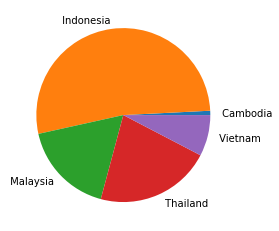

In [13]:
#Đánh giá tỷ lệ nên dùng biểu đồ tròn
plt.pie(DNA.iloc[:,2], labels = DNA.iloc[:,0])
plt.show()